## XGBoost with Pixels

In [1]:
import numpy as np

with open("data/train_pixels.npy", "rb") as f:
    X_train = np.load(f)
    
with open("data/train_labels.npy", "rb") as f:
    y_train = np.load(f)
    
with open("data/test_pixels.npy", "rb") as f:
    X_test = np.load(f)
    
with open("data/test_labels.npy", "rb") as f:
    y_test = np.load(f)

In [2]:
X_train = X_train.reshape(-1, 48*48)
X_test = X_test.reshape(-1, 48*48)

In [3]:
from xgboost import XGBClassifier

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

xgbmodel = XGBClassifier(objective='multi:softprob', 
                         num_class= len(emotions), 
                         use_label_encoder=False,
                         eval_metric='mlogloss')

print("fitting")
xgbmodel.fit(X_train, y_train)

print("scoring")
xgbmodel.score(X_test, y_test)

fitting
scoring


0.5873502368347729

In [4]:
from sklearn.metrics import classification_report

y_pred = xgbmodel.predict(X_test)
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.61      0.30      0.40       385
     Disgust       0.90      0.26      0.40        35
        Fear       0.95      0.18      0.30       119
       Happy       0.62      0.68      0.65       936
         Sad       0.50      0.28      0.35       490
    Surprise       0.71      0.60      0.65       433
     Neutral       0.55      0.79      0.65      1191

    accuracy                           0.59      3589
   macro avg       0.69      0.44      0.48      3589
weighted avg       0.60      0.59      0.57      3589



In [6]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label \n\n')

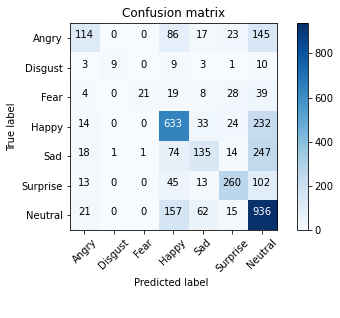

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)

### XGBoost with Landmarks

In [11]:
import numpy as np

with open("data/train_landmarks.npy", "rb") as f:
    X_train = np.load(f)
    
with open("data/train_labels.npy", "rb") as f:
    y_train = np.load(f)
    
with open("data/test_landmarks.npy", "rb") as f:
    X_test = np.load(f)
    
with open("data/test_labels.npy", "rb") as f:
    y_test = np.load(f)

In [13]:
from xgboost import XGBClassifier

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

xgbmodel = XGBClassifier(objective='multi:softprob', 
                         num_class= len(emotions), 
                         use_label_encoder=False,
                         eval_metric='mlogloss')

print("fitting")
xgbmodel.fit(X_train, y_train)

print("scoring")
xgbmodel.score(X_test, y_test)

fitting
scoring


0.5547506269155754

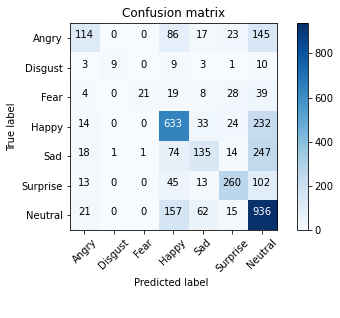

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)